## Importing the Needed Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Reading Dataset

In [21]:
df = pd.read_csv('road_accident_data.csv')

## Data Representation

In [23]:
df.head()

,ID,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,...,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
0,165433,Connecticut,2024-02-20 05:46:20,Tuesday,19:59:02,Rainy,Muddy,Daylight,Street,T-Junction,...,2,3,57.0,3.303606,3.139351,485.649011,4.886202,0.904971,45.0,25.152781
1,165434,Massachusetts,2024-01-09 05:08:31,Wednesday,21:28:51,Sunny,Muddy,Daylight,Highway,Intersection,...,1,0,55.0,2.715327,3.634593,616.979936,4.677592,0.949236,41.0,23.163817
2,165435,Wyoming,2024-02-20 08:26:27,Thursday,18:04:26,Snowy,Snowy,Dawn,Street,Underpass,...,3,1,38.0,4.811429,9.631561,838.741654,9.926058,0.184447,64.0,6.697750
3,165436,Hawaii,2024-01-15 03:23:47,Sunday,16:51:02,Snowy,Icy,Daylight,Street,Intersection,...,5,0,59.0,6.976968,2.334468,842.441019,4.351822,0.195811,NaN,6.595036
4,165437,Oklahoma,2024-02-10 10:17:29,Tuesday,14:19:19,Foggy,Icy,Night,Rural,T-Junction,...,2,0,53.0,3.724599,4.359620,905.620262,6.626862,0.954821,81.0,22.913128


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               1610 non-null   object 
 1   Month                               1610 non-null   int32  
 2   Day_of_Week                         1610 non-null   object 
 3   Time_of_Day                         1610 non-null   object 
 4   Weather_Conditions                  1610 non-null   object 
 5   Road_Conditions                     1610 non-null   object 
 6   Light_Conditions                    1610 non-null   object 
 7   Type_of_Road                        1610 non-null   object 
 8   Type_of_Junction                    1610 non-null   object 
 9   Type_of_Accident                    1610 non-null   object 
 10  Vehicle_Type                        1610 non-null   object 
 11  Driver_Age_Group                    1610 no

In [27]:
df.describe()

,ID,Num_Vehicles_Involved,Num_Casualties,Speed_Limit,Distance_to_Nearest_Hospital,Distance_to_Nearest_Police_Station,Visibility,Road_Width,Road_Surface_Friction_Coefficient,Vehicle_Speed,Time_Taken_for_Emergency_Response
count,1610.000000,1610.000000,1610.000000,1457.000000,1610.000000,1610.000000,1610.000000,1453.000000,1610.000000,1433.000000,1444.000000
mean,166237.500000,3.062112,1.444099,50.144132,5.062241,5.049247,553.774075,6.537440,0.549663,49.933008,17.771576
std,464.911282,1.412848,1.155813,11.869475,2.890145,2.800700,258.589644,2.011750,0.259722,29.279972,7.245455
min,165433.000000,1.000000,0.000000,30.000000,0.113713,0.100520,100.224514,3.000363,0.100261,0.000000,5.032373
25%,165835.250000,2.000000,0.000000,40.000000,2.549658,2.708608,327.701610,4.773072,0.315058,24.000000,11.501425
50%,166237.500000,3.000000,1.000000,50.000000,5.151083,4.977115,557.361549,6.623199,0.550753,49.000000,17.498544
75%,166639.750000,4.000000,3.000000,60.000000,7.563470,7.474726,781.561590,8.284306,0.774580,76.000000,24.183088
max,167042.000000,5.000000,3.000000,70.000000,9.999620,9.998113,999.931342,9.996583,0.999489,100.000000,29.981212


In [29]:
df.describe(include='object')

,State,Date,Day_of_Week,Time_of_Day,Weather_Conditions,Road_Conditions,Light_Conditions,Type_of_Road,Type_of_Junction,Type_of_Accident,Vehicle_Type,Driver_Age_Group
count,1610,1610,1610,1610,1461,1610,1610,1610,1455,1610,1610,1610
unique,50,1610,7,1597,5,5,4,5,6,7,5,4
top,Hawaii,2024-02-20 05:46:20,Tuesday,00:05:59,Rainy,Dry,Dusk,Rural,Underpass,Cyclist involved,Truck,Adult
freq,47,1,252,2,313,336,415,336,255,246,352,420


In [31]:
#this shows the number of columns and rows
df.shape

(1610, 23)

## Data Wrangling

In [33]:
#count the total missing values in the entire dataset
df.isnull().sum().sum()

957

In [35]:
#finding the percentage of missing values in each column to know whether its too high or not
df.isnull().sum()/df.shape[0]*100

ID                                     0.000000
State                                  0.000000
Date                                   0.000000
Day_of_Week                            0.000000
Time_of_Day                            0.000000
Weather_Conditions                     9.254658
Road_Conditions                        0.000000
Light_Conditions                       0.000000
Type_of_Road                           0.000000
Type_of_Junction                       9.627329
Type_of_Accident                       0.000000
Vehicle_Type                           0.000000
Driver_Age_Group                       0.000000
Num_Vehicles_Involved                  0.000000
Num_Casualties                         0.000000
Speed_Limit                            9.503106
Distance_to_Nearest_Hospital           0.000000
Distance_to_Nearest_Police_Station     0.000000
Visibility                             0.000000
Road_Width                             9.751553
Road_Surface_Friction_Coefficient      0

In [37]:
#check for duplicate values
df.duplicated().sum()

0

In [39]:
#identifying any garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("**"*10)

State
Hawaii            47
Maryland          45
South Dakota      41
Colorado          41
Wyoming           39
Mississippi       39
Utah              39
Alaska            38
South Carolina    37
Florida           37
Oklahoma          36
West Virginia     36
Maine             36
Arizona           35
Missouri          35
Washington        35
Vermont           35
Tennessee         35
New Hampshire     35
Kansas            34
Michigan          34
North Dakota      34
California        34
Delaware          34
Alabama           34
Massachusetts     32
Illinois          32
Georgia           32
Nevada            32
Montana           31
Pennsylvania      31
Rhode Island      30
Arkansas          30
Idaho             29
Nebraska          29
Minnesota         29
Connecticut       28
New Jersey        28
Iowa              28
New Mexico        28
Virginia          27
Oregon            27
North Carolina    27
Indiana           26
New York          25
Wisconsin         25
Texas             21
Kentuck

In [41]:
# Check for negative values
numerical_columns = ['Num_Vehicles_Involved','Num_Casualties','Speed_Limit','Distance_to_Nearest_Hospital','Distance_to_Nearest_Police_Station',
                        'Visibility','Road_Width','Road_Surface_Friction_Coefficient','Vehicle_Speed','Time_Taken_for_Emergency_Response']

print("Checking for negative values:")
for col in numerical_columns:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        if neg_count == 0:
            print("No negative values found")
        elif neg_count > 0:
            print(f"{col}: {neg_count} negative values found")
            df = df[df[col] >= 0]
                
print("Cleaning complete")

Checking for negative values:
No negative values found
No negative values found
No negative values found
No negative values found
No negative values found
No negative values found
No negative values found
No negative values found
No negative values found
No negative values found
Cleaning complete


In [43]:
#adding outliers to numerical columns 
outlier_rows = pd.DataFrame({
    'Vehicle_Speed': [100, 200, 180, 190, 160, 195, 170, 100, 210, 0],
    'Visibility': [1700, 2400, 2500, 2800, 1800, 2300, 2900, 2200, 2250, 2550],
    'Num_Vehicles_Involved': [5, 15, 20, 25, 23, 21, 17, 16, 22, 0]
})
df = pd.concat([df, outlier_rows], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

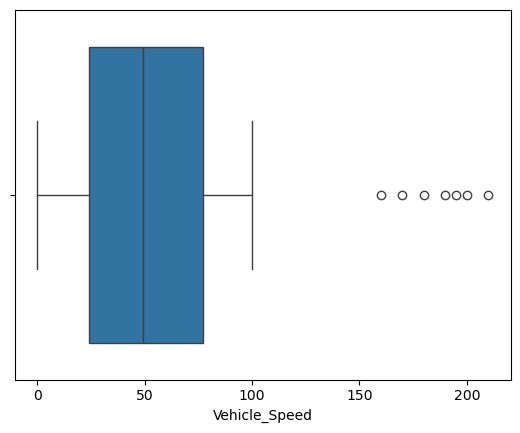

In [45]:
sns.boxplot(x='Vehicle_Speed', data=df)
plt.show()

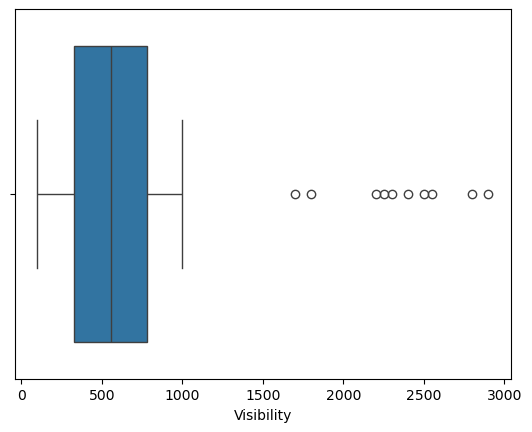

In [46]:
sns.boxplot(x='Visibility', data=df)
plt.show()

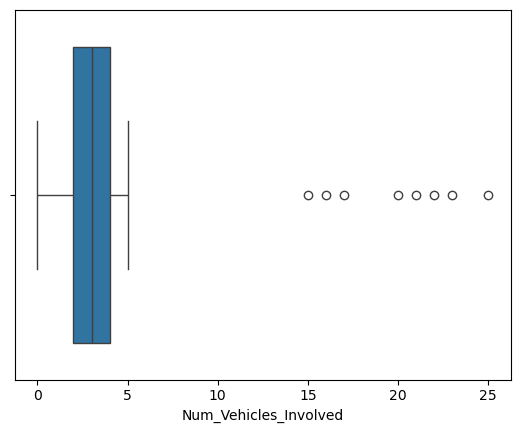

In [48]:
sns.boxplot(x='Num_Vehicles_Involved', data=df)
plt.show()

In [49]:
columns_to_check = ['Vehicle_Speed','Num_Vehicles_Involved','Visibility']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'Column: {col}')
    print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    filter_lower_bound = (df[col] < lower_bound)
    filter_upper_bound = (df[col] > upper_bound)
    print(f'The outlier values from the dataset:')
    print(df[col][(filter_lower_bound | filter_upper_bound)])
    print('-' * 40)

Column: Vehicle_Speed
Q1: 24.0, Q3: 77.0, IQR: 53.0
Lower Bound: -55.5, Upper Bound: 156.5
The outlier values from the dataset:
358     200.0
640     160.0
915     210.0
984     180.0
995     195.0
1025    190.0
1528    170.0
Name: Vehicle_Speed, dtype: float64
----------------------------------------
Column: Num_Vehicles_Involved
Q1: 2.0, Q3: 4.0, IQR: 2.0
Lower Bound: -1.0, Upper Bound: 7.0
The outlier values from the dataset:
358     15
640     23
915     22
984     20
995     21
1025    25
1175    16
1528    17
Name: Num_Vehicles_Involved, dtype: int64
----------------------------------------
Column: Visibility
Q1: 328.952025525, Q3: 783.65717765, IQR: 454.705152125
Lower Bound: -353.10570266249994, Upper Bound: 1465.7149058374998
The outlier values from the dataset:
251     1700.0
358     2400.0
640     1800.0
915     2250.0
984     2500.0
995     2300.0
1025    2800.0
1175    2200.0
1210    2550.0
1528    2900.0
Name: Visibility, dtype: float64
-----------------------------------

In [51]:
#delete outliers from dataset
df = df[~(filter_lower_bound | filter_upper_bound)].reset_index(drop=True)

In [55]:
#drop "ID" column
df.drop(columns =['ID'], inplace = True)

In [57]:
#extracting the month from the date, then dropping the "Date" column 
date_position = df.columns.get_loc('Date') 
df.insert(date_position, 'Month', pd.to_datetime(df['Date']).dt.month) 
df.drop(columns =['Date'], inplace = True)

In [59]:
#convert 'Time_of_Day' to datetime format (extract hour) 
  
df['Hour'] = pd.to_datetime(df['Time_of_Day'], format='%H:%M:%S', errors='coerce').dt.hour 

def correct_light_condition(hour):
    if 6 <= hour < 18:
        return 'Daylight'
    elif (5 <= hour < 6):
        return 'Dawn'
    elif(18 <= hour < 19):
        return 'Dusk'
    else:
        return 'Night' 

df['Corrected_Light_Conditions'] = df['Hour'].apply(correct_light_condition)  
df.loc[df['Light_Conditions'] != df['Corrected_Light_Conditions'], 'Light_Conditions'] = df['Corrected_Light_Conditions'] 
df.drop(columns=['Corrected_Light_Conditions', 'Hour'], inplace=True)

In [61]:
#adding “Speed Violation” aggregation function
df['Speeding_Violation'] = df['Vehicle_Speed'] > df['Speed_Limit']

In [99]:
# adding new column (Speeding_Factor)
df['Speeding_Factor'] = df['Vehicle_Speed'] / df['Speed_Limit']

## Handling null values using Last Obserevation Carried Forward (LOCF)

In [63]:
df.isnull().sum().sum()

957

In [78]:
df = df.fillna(method = 'pad')

## Importing the Dataframe to a new CSV file

In [122]:
df.to_csv('cleaned_dataset.csv', index=False)

## Visualization and Analysis

#### general insights

In [263]:
##-How many accidents are recorded in the dataset?
total_accidents = len(df)

In [277]:
# -Which states have the highest number of recorded accidents?
accidents_by_state = df['State'].value_counts()
accidents_by_state

State
Hawaii            47
Maryland          45
South Dakota      41
Colorado          41
Utah              39
Wyoming           39
Mississippi       39
Alaska            38
Florida           37
South Carolina    37
West Virginia     36
Oklahoma          36
Maine             36
New Hampshire     35
Arizona           35
Vermont           35
Tennessee         35
Washington        35
Missouri          35
Michigan          34
California        34
Delaware          34
Kansas            34
North Dakota      34
Alabama           34
Georgia           32
Massachusetts     32
Nevada            32
Illinois          32
Montana           31
Pennsylvania      31
Arkansas          30
Rhode Island      30
Nebraska          29
Idaho             29
Minnesota         29
Iowa              28
New Mexico        28
Connecticut       28
New Jersey        28
North Carolina    27
Oregon            27
Virginia          27
Indiana           26
New York          25
Wisconsin         25
Texas             21
Kentuck

In [287]:
# -How many vehicles are typically involved in accidents?
vehicles_involved_stats = df['Num_Vehicles_Involved'].describe()

In [289]:
# -What is the average vehicle speed at the time of accidents?
average_vehicle_speed = df['Vehicle_Speed'].mean()
total_accidents, accidents_by_state, vehicles_involved_stats, average_vehicle_speed

(1610,
 State
 Hawaii            47
 Maryland          45
 South Dakota      41
 Colorado          41
 Utah              39
 Wyoming           39
 Mississippi       39
 Alaska            38
 Florida           37
 South Carolina    37
 West Virginia     36
 Oklahoma          36
 Maine             36
 New Hampshire     35
 Arizona           35
 Vermont           35
 Tennessee         35
 Washington        35
 Missouri          35
 Michigan          34
 California        34
 Delaware          34
 Kansas            34
 North Dakota      34
 Alabama           34
 Georgia           32
 Massachusetts     32
 Nevada            32
 Illinois          32
 Montana           31
 Pennsylvania      31
 Arkansas          30
 Rhode Island      30
 Nebraska          29
 Idaho             29
 Minnesota         29
 Iowa              28
 New Mexico        28
 Connecticut       28
 New Jersey        28
 North Carolina    27
 Oregon            27
 Virginia          27
 Indiana           26
 New York         

In [291]:
# -What is the average vehicle speed at the time of accidents?
average_vehicle_speed = df['Vehicle_Speed'].mean()
total_accidents, accidents_by_state, vehicles_involved_stats, average_vehicle_speed

(1610,
 State
 Hawaii            47
 Maryland          45
 South Dakota      41
 Colorado          41
 Utah              39
 Wyoming           39
 Mississippi       39
 Alaska            38
 Florida           37
 South Carolina    37
 West Virginia     36
 Oklahoma          36
 Maine             36
 New Hampshire     35
 Arizona           35
 Vermont           35
 Tennessee         35
 Washington        35
 Missouri          35
 Michigan          34
 California        34
 Delaware          34
 Kansas            34
 North Dakota      34
 Alabama           34
 Georgia           32
 Massachusetts     32
 Nevada            32
 Illinois          32
 Montana           31
 Pennsylvania      31
 Arkansas          30
 Rhode Island      30
 Nebraska          29
 Idaho             29
 Minnesota         29
 Iowa              28
 New Mexico        28
 Connecticut       28
 New Jersey        28
 North Carolina    27
 Oregon            27
 Virginia          27
 Indiana           26
 New York         

In [301]:
# -what are the most common accident types?
accident_counts = df["Type_of_Accident"].value_counts().head(10)

In [303]:
# -Does speeding result in more accidents?
speeding_counts = df["Speeding_Violation"].value_counts(normalize=True) * 100

In [305]:
# -which type of road has more accidents?
road_type_counts = df["Type_of_Road"].value_counts()


### Q1: "How do road conditions and road type affect emergency response times and the frequency of emergency cases at different hospital distances?" 

##### Explaining the question at a depper level: How do different road conditions vary among the different types of roads, and does certain road types lead to inconsistent emergency response times, and how does this vary in terms of the number of emergency cases recorded at varying distances from hospitals?


Roads influence the number of cases of emergency since they can increase or decrease the chances of accidents and medical emergencies. Types
of roads such as highways, residential streets, or rural roads can also affect them in terms of the delay or time it takes for emergency 
vehicles to get through different infrastructure aspects. For example, rural roads may become muddy or icy under adverse weather 
conditions, leading to a higher number of emergencies, therefore, we also want to look into the number of emergency cases that occur
in each road type. Do some accidents occur frequently at a specific road type more than the other? We will know this by examining
th number of emergency cases for each road type and how does the distance to the nearest hospital play a role in this. What if usually accidents
occur in certain road types that are near to the hospital than those that are far away?

To better understand the relationship between road types and road conditions, we will analyze how different road types
correlate with specific road conditions, as this will provide insights into whether certain road types are more prone to poor
conditions, which is potentially contributing to a higher number of emergency cases, additionally, we want to examine whether some road types have 
inconsistent emergency response times, which indicates that while some cases receive quick assistance, others may experience 
significant delays due to road traffic, or infrastructure. Furthermore, we will explore how the number of emergency cases varies across different hospital distance ranges based on road type. While shorter distances to the nearest hospital may generally suggest quicker access to medical care, we want to investigate whether certain road types result in more frequent emergencies in specific distance ranges. For instance, do poorly maintained urban roads lead to more emergency cases despite being close to hospitals, and how does it differ if was far away from hospital? Or do highways report fewer emergencies due to their maintained road conditions? Basically, we are analyzing if whether road type influence both the number of emergency cases across various hospital distance ranges and how do some roads show variability in emergency response time.

In emergency medical response, the time taken for individuals to receive help is vital. 
Response time is affected by many factors including the type of road. We will determine if any  if any specific road causes
consistently fast or slow responses response time whether it is Urban, Rural, Street, Freeway, 
and Highway. This way, we want to possibly observe some trends and complications that exist with emergency
responders all based on road infrastructure.
    
Features Used:
Type_of_Road
Road_Conditions
Distance_to_Nearest_Hospital
Number_of_Emergency_Cases

Lets first explore how various road conditions appear in road types, and understand how different road conditions vary across 
different road types. We want to determine whether certain road types often contribute to a specific road condition, which may
indicate infrastructure quality or maintenance issues. For example, we could expect that rural roads may have muddy roads most often
compared to highways or other road types. 
Some questions that we can answer from this:
•	Which road types experience the worst conditions most frequently? 
•	Do certain conditions occur more frequently on specific road types? 
•	Do rural from significantly worse conditions compared to highways? 
We use a heatmap to visualize this and compare between the various combinations we get, thus, observe if 
there is a pattern that exists, as identifying these patterns helps us understand how it affects 
emergency cases and response time. 
Thus, we first compare the distribution of road conditions across different road types.

In [144]:
#first count the frequency for each road type under each road condition
roadCombinations = df.groupby(["Type_of_Road", "Road_Conditions"]).size().reset_index(name="Count")
#roadCombinations 

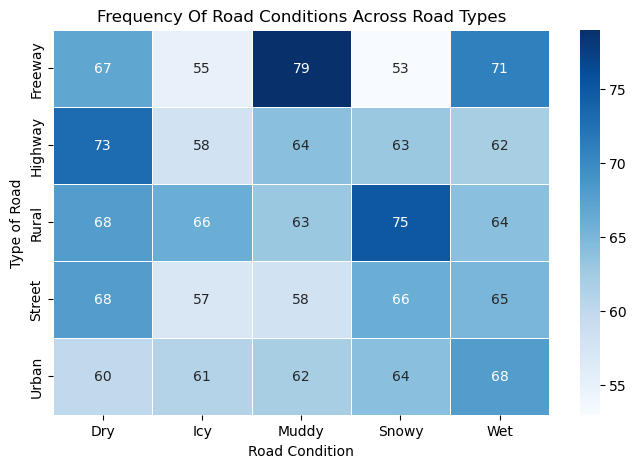

In [146]:
#plotting a heatmap to observe 
roadTypesCondition = roadCombinations.pivot(index="Type_of_Road", columns="Road_Conditions", values="Count")
plt.figure(figsize=(8,5))
sns.heatmap(roadTypesCondition, annot=True, cmap="Blues", linewidths=0.5)

plt.title("Frequency Of Road Conditions Across Road Types")
plt.xlabel("Road Condition")
plt.ylabel("Type of Road")
plt.show()

Insights We Get From the Heatmap:
Muddy road conditions: More frequent on Freeways.
Snowy road conditions: More frequent on Rural roads.
Wet road conditions: More frequent on freeways and Urban roads.
Dry road conditions: Relatively high across all types, but slightly lower in Urban and higher in highways.
Icy road conditions: Relatively low across all types, suggesting it's less common overall, but it occurs the most in rural road types.

Freeways have the highest count of "Muddy" conditions, 79, among all, this tells us that most of the time of 
the accidents that occured in freeways have muddy roads, as well as wet roads, beacuse from the heatmap we observe that freeways 
mostly have muddy and wet road conditions, which can in fact make it hard for drivers to drive through and thus freeways may result
in having high cases of emergency calls. It may be muddy possibly due to their construction features, maintenance practices,
or high traffic that make them more prone to mud accumulations.

For snowy road conditions, it is shown that rural roads have the highest count of snowy roads,75, which is expected because rural areas
often experience more snowfall and less frequent snow removal compared to other areas such as urban or freeways.
Dry road conditions have relatively high counts across all road types, as expected, since dry weather is generally more common, though highways 
has the highest count for dry roads.

Urban roads usually tend to have wet road conditions, according to the heatmap, having a record of 68. 
Ths could be due to higher precipitation in urban areas or more frequent exposure to water due to 
street cleaning or drainage patterns, as the drainage system in urban areas might lead to water accumulation and wet conditions.
Since icy road conditions is the least, we may assume that there are effective measures taken in areas to help mitigate ice on roads.

Now we analyze whether some road types have inconsistent emergency resposne times, so we use a box plot to 
see the distribution and median which may help in identiying variability and inconsistency to analyze whether certain road.

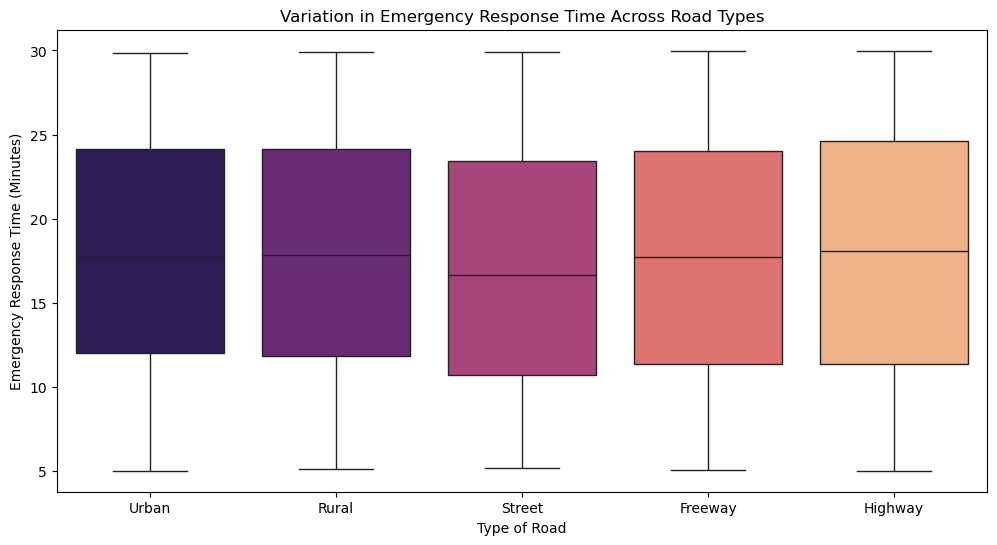

In [152]:
#setting the appropriate figure size
plt.figure(figsize=(12, 6))

#box plot for emergency response time across road types
sns.boxplot(x="Type_of_Road", y="Time_Taken_for_Emergency_Response", data=df, palette="magma")

#adding labels and titles
plt.title("Variation in Emergency Response Time Across Road Types")
plt.xlabel("Type of Road")
plt.ylabel("Emergency Response Time (Minutes)")
plt.show() #displaying the plot


The results from the box plot reveal that there is no strong correlation between road type and emergency response time.
The median response time remains fairly consistent across all road types, with fluctuations
occurring within a similar range. This means that while there are variations, no particular road type consistently leads
to significantly longer or shorter response times, in fact there is a general consstency in response times with most of them falling
between 12 to 25 minutes regardless of road type, hence, this variability 
that we observed across different road types suggests that factors beyond just road type contribute to response time delays. 

Occasional long delays (up to 30 minutes) occur, but they are not specific to any road type. 
This suggests that other factors—such as weather, traffic, or hospital capacity—may contribute to these extended response times.
    
Though, according to the box plot, streets have the smallest median, meaning it requires the least average response times compared to others
, even though it varies only by 1-2 mins.
The median response time is similar across all road types, around 16-18 minutes, suggesting that on average, the responsne times for 
the different road types actually do not differ dramatically.
One of the expectations was that freeways would take long response times due to its muddy or wet road conditions which was
shown previously when we ought to see the combinations between road conditions and its road type, also since it has very high traffic, however
it is proved to not be the major factor.  
    
Therefore, we conclude that no road type has a consistently shorter or longer response time, since all of them share close values
of median and IQR.
This may suggest that other factors (like hospital distance, or weather) might have a stronger 
influence on delays rather than just road type alone.

Since road type alone does not strongly predict response time fluctuations, we can now further explore 
by understanding where the number of emergency incidents occur most frequently, by observing the
number of emergency calls reported occurring on different road types in relation to hospital distance. This will help determine
whether certain road types are more prone to emergencies (more accidents occuring) and if the distance from hospital influences the number
of reported cases. 
For example, which types of roads report the highest number of emergency cases? Are highways, urban roads, or rural roads more
prone to accidents, thereofre resulting in more emergency calls from these areas?

Does distance to the nearest hospital influence the emergency cases counted in different types of roads? Does 
being closer to a hospital reduce the frequency of emergencies, or do certain roads consistently report high
numbers of cases regardless of hospital proximity?

First, we will create a new column that categorizes hospital distance into ranges, and this makes it 
easier to interpret the data and analyze if there occurs any trends. Now instead of having to work with 
raw vales for hospital distances, we have categorized it into ranges so that it is much better to compare the
number of emergency cases/calls that is reported across various hospital ranges. 


In [159]:
#this is defining the hospital bins, and naming the apropriate labels for each range
distance_bins = [0, 3, 6, 10, float('inf')]  
distance_labels = ["0-3 km", "3-6 km", "6-10 km", "10+ km"] 

#categorzing the hospital ranges based on the bins values we assigned. This will create a new column 'Hospital_Distance_Range'
df['Hospital_Distance_Range'] = pd.cut(df['Distance_to_Nearest_Hospital'], bins=distance_bins, labels=distance_labels)

#now we count the number of emergency calls, and group by road type and distance ranges #aggregation
road_type_case_counts = df.groupby(["Hospital_Distance_Range", "Type_of_Road"])['Time_Taken_for_Emergency_Response'].count().reset_index(name="Count")
#road_type_case_counts #to print results and see exact values

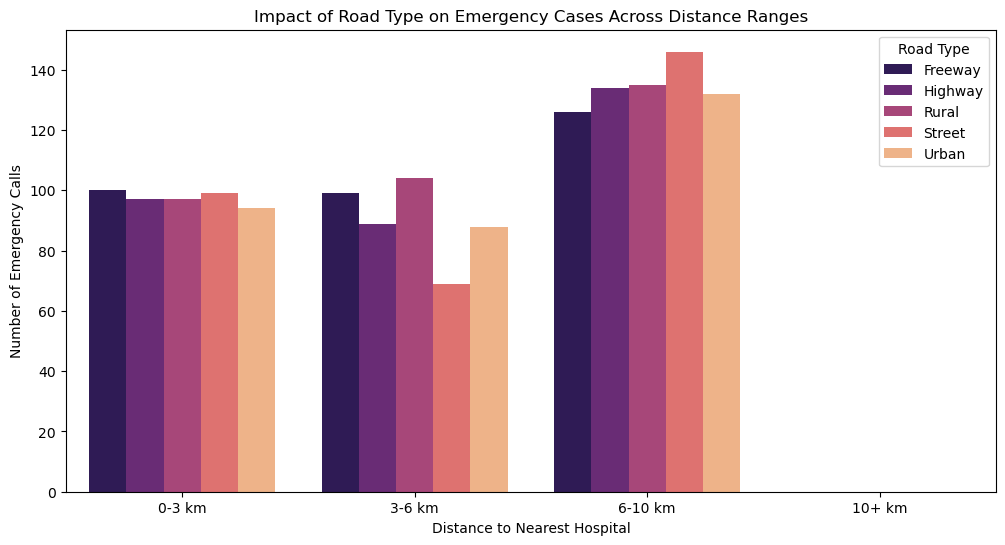

In [161]:
#plotting the bar chart
plt.figure(figsize=(12, 6)) #setting the size
sns.barplot(x="Hospital_Distance_Range", y="Count", hue="Type_of_Road", data=road_type_case_counts, palette="magma")

#displaying titles to make it better to understand
plt.title("Impact of Road Type on Emergency Cases Across Distance Ranges")
plt.xlabel("Distance to Nearest Hospital")
plt.ylabel("Number of Emergency Calls")
plt.legend(title="Road Type")
plt.show()

All accidents have been reported when the distance to the nearest hospital is from 0-10 km, so the 10+ remains empty
which tells us that there is no accidents reported in the data after such distance. It could also indicate that emergency 
services might be less frequently dispatched or recorded beyond this distance.
    
A pattern that we have observed is how the emergency calls increase among some road types when the distance to the nearest hospital increase,
this shows that there is a direct proportion between number of emergency calls and the distance to the hospital, however, streets and urban areas seems to show a drop in emergency calls when its 3-6 km away from hospitals, which may be unsual and as distance increases to 6-10 km the emergency calls seem to increase by a large factor. A possible reason for this may be that the 3-6 km zone might have better-maintained roads or fewer intersections, leading to fewer accidents.
    
Freeways and rural road types show a steady increase for emergency calls as the distance increases, this highlights the impact of population density or traffic congestion that occurs when acidents happen far from hospitals, making these two type of roads have a direct relaton with the distance to hospital, hence we can make an assumption that if increasing the distance more it may result in more emergency calls for these two road types, but as for other road areas it may show some increase as well though it is likely to show some fluctuations compared to freeways and rurals.
    
Steets has shown the highest emergency cases at the farest distance, this may also result from traffic congestion as the further away 
you get from the emergency hospital areas, it will likely increase traffic congestion therefore resulting in a large amount of accidents. However, it has shown a large fluctuation as from 0-3 km it had 99 emergency cases, then at 3-6 it drops to 69, and then at the largest distance which is 6-10 km it increases sharply to around 146 emergency calls, which shows a significant fluctuations in emergency cases compared to other road types. Urban roads and highway roads also tend to show a similar trend to streets, however, they do not show a very sharp fluctuation like in streets.

Since all road types show an increase in emergency calls in the 6-10 km range. This points to a critical threshold where factors like response times, road conditions, and incident severity become more significant. In such a zone, we can assume that road maintenance might be less frequent in these areas, leading to poorer road conditions and increased accident risk.

When comparing between 0-3 km and 6-10 km, all road types show a significant increase in the number of emergency calls when
they are at a distance from 6-10km, which infers a direct relation, though at 3-6 km some of these road types show a drop in calls, 
meaning there is some factor that caused such fluctuations, like better maintained roads, or it may also indicate that this range might encompass less 
densely populated residential areas or industrial zones with lower traffic density.

In [ ]:
df.head()

After analyzing the question using data visuaizatons, the analysis reveals that some road conditions frequently appear in certain road types, for example, it was shown that Freeways experience the highest muddy and wet conditions, making them prone to accidents and suggesting that a reason for these road conditions to occur could be due to traffic conditions, while Rural roads have the most snowy and icy conditions, increasing accident risk, and road conditions in urban areas, on the other hand, are usually wet. From these insights, we can assume that such road types should show longer emergency response times, and how can they impact the number of emergency cases. Despite these differences, emergency response times remain relatively consistent across road types, with most responses occurring from 12-25 minutes. While streets show the lowest median response time, the variation among different road types is in fact minimal, meaning emergency response times is not heavily dependent on road types, this tells us that there may be other factors that influence it. Typical delays may occur up to a maximum of 30 minutes on different types of roads but do not exceed that limit, suggesting that other external factors—such as traffic congestion, hospital capacity, and weather conditions—play a more significant role in response time fluctuations. Furthermore, along with the road types considered, the number of emergency cases seen, increases as the distance from hospitals increases, more predominantly on freeways and rural roads, whereby cases steadily rise with an increase in distance. An interesting observation was that cases in urban and street roads displayed fluctuations, first decreasing between 3 and 6 km before rising sharply between 6 and 10 km, which can be due to possible reasons like road maintenance or traffic congestion. This indicates that although the type of road (highway, urban, rural, street) and its condition (muddy, wet, snowy, etc.) contribute to the occurrence of accidents, they are not the very primary factors determining how quickly emergency responders arrive(emergency response time) or how frequently emergency calls(number of emergency calls) are reported. Instead, we may assume that some factors such how close hospitals and ambulance stations are, how well-connected the roads are, and how efficiently emergency vehicles can navigate them and also infrastructure quality, or in other words, the presence of proper road maintenance, traffic control systems, and clear emergency pathways may play a bigger role in ensuring timely response and reducing the frequency of severe emergencies.

### Q2: "Do accidents with vehicle speeds exceeding the speed limit result in more multi-vehicle collisions, and does road width play a role?"
##### Are accidents occurring at high speeds destined to have some collateral damage, due to the vehicle being out of control, especially taking the road’s width into account, does the narrower the road result in more vehicles being involved in nearby accidents?

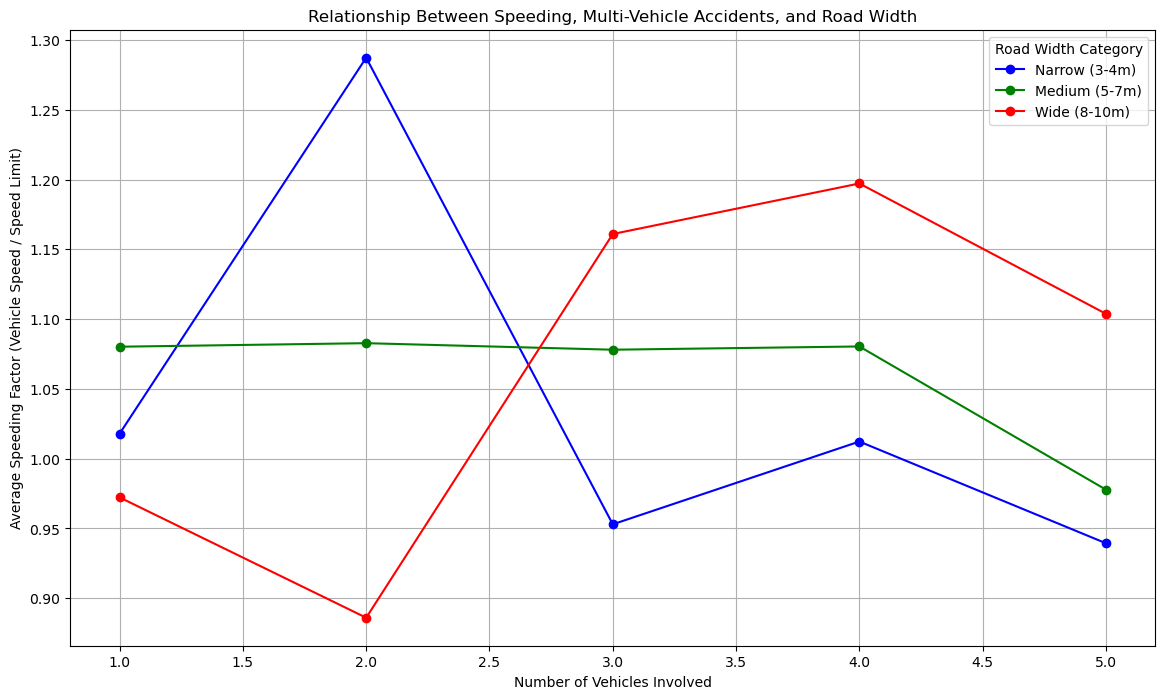

In [170]:
# categorizing road widths
def categorize_road_width(width):
    if width <= 4:
        return 'Narrow (3-4m)'
    elif width <= 7:
        return 'Medium (5-7m)'
    else:
        return 'Wide (8-10m)'

df['Road_Width_Category'] = df['Road_Width'].apply(categorize_road_width)

#color coding road widths
road_width_colors = {'Narrow (3-4m)': 'blue', 'Medium (5-7m)': 'green', 'Wide (8-10m)': 'red'}

plt.figure(figsize=(14, 8))

#looping through each road width category and plotting data separately
for category, color in road_width_colors.items():
    subset = df[df['Road_Width_Category'] == category]
    avg_speed_by_vehicles = subset.groupby('Num_Vehicles_Involved')['Speeding_Factor'].mean()
    plt.plot(avg_speed_by_vehicles.index, avg_speed_by_vehicles.values, 
             marker='o', linestyle='-', color=color, label=category)

#naming axises and legends
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Average Speeding Factor (Vehicle Speed / Speed Limit)')
plt.title('Relationship Between Speeding, Multi-Vehicle Accidents, and Road Width')
plt.legend(title='Road Width Category')
plt.grid(True)

plt.show() 

### answer and Insight

The question was proposed to analyze the relationship between speeding at various road widths and whether they would result in more vehicles being involved in the accident, an average speeding factor has been plotted on the Y-axis (Vehicle Speed / Speed Limit), to observe if higher vehicle speeds are proportionate to the number of neighboring cars to be involved in the accident. 

We can see that at the start of the graph, exceeding the speed limit at narrow roads resulted in 2 or less vehicles being involved in an accident, but started to decline due to the nature of narrow roads not containing as many vehicles as medium, or wide roads. 

We can also see that the higher average speeding factor is on wide the more vehicles are involved in an accident, this may be because of the more volume of vehicles being on the road and speed limits are by nature higher on wide roads (freeways, highways), and higher speeds do result in in more accidents occurring.


### Q3: "How do different states vary in the types of junctions where accidents occur, and which junctions are most accident-prone and result in severe accidents in each state?" 

Certain junction types might lead to more casualties in specific states due to traffic density or accident frequency. States with many intersections may have more casualties per accident compared to those with more roundabouts, or other types of junctions.

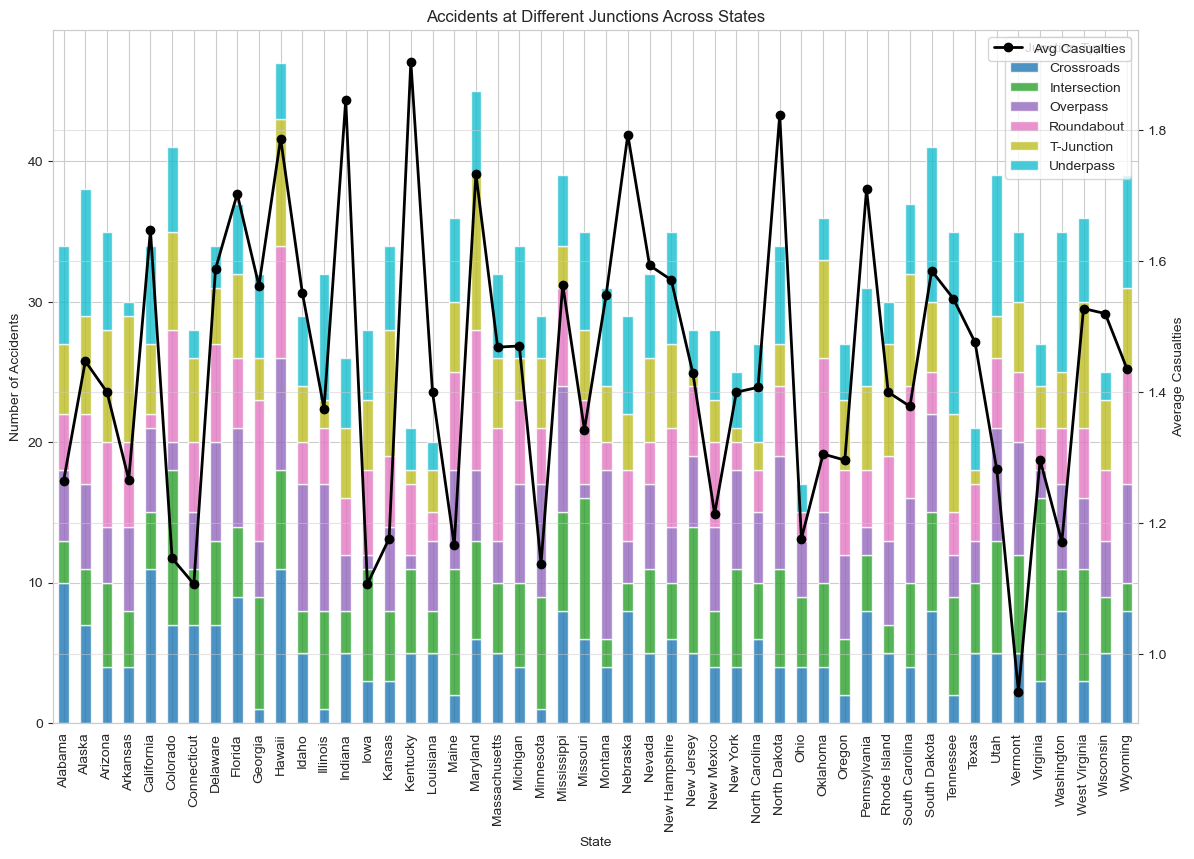

In [245]:
#counting the number of accidents for each state and the junction type that the accident occurred
accident_counts = df.groupby(['State', 'Type_of_Junction']).size().unstack(fill_value=0)

#average number of casualties per state
avg_casualties = df.groupby('State')['Num_Casualties'].mean()

#create a figure and axis for the bar chart
fig, ax1 = plt.subplots(figsize=(14, 9))

#plot stacked bar chart (Accidents per junction type in each state)
accident_counts.plot(kind='bar', stacked=True, ax=ax1, colormap='tab10', alpha=0.8)

#to create the second y axis
ax2 = ax1.twinx()
#plot a line graph on the other y axis with linewidth of 2 to represent the average number of casualities
ax2.plot(avg_casualties.index, avg_casualties.values, color='black', marker='o', linestyle='-', linewidth=2, label='Avg Casualties')

#naming each dimension of the graph
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Accidents')
ax1.set_title('Accidents at Different Junctions Across States')
ax2.set_ylabel('Average Casualties')

#setting up legends
ax1.legend(title='Junction Type', loc='upper right')
ax2.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.5)

plt.show()

This graph highlights variations in accident frequency and severity across states based on junction types. Crossroads and intersections account for the highest number of accidents, while roundabouts and underpasses appear safer. States like Florida, Texas, and New York show significantly more accidents, likely due to higher traffic density. However, high accident frequency does not always correlate with high casualties. States such as Kentucky, Missouri, and Montana show spikes in average casualties, suggesting more severe accidents. Factors like speed limits, road design, enforcement, and emergency response may contribute to these differences. Further analysis of accident severity by junction type, road width, and safety measures could provide deeper insights into reducing casualties.

### Q4- “How does the distance to the nearest police station and hospital along with the road type and time of day influence the emergency response time in each US state and what recommendations can be made to improve efficiency?"

#### To answer this question we first need to find correlations between the distance to nearest hospital and police station and how it impacts the response times. Here is the code to plot that relation, line plot is used for this.

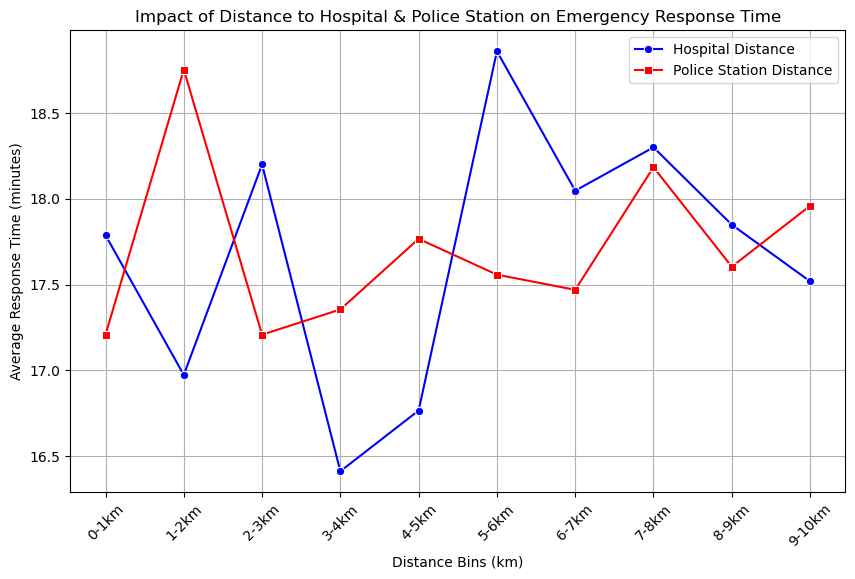

In [182]:
# we first categorized both distances into bins to make it easier to visualize then found the average response times 
df["Hospital_Distance_Bin"] = pd.cut(df["Distance_to_Nearest_Hospital"], 
                                     bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                                     labels=["0-1km", "1-2km", "2-3km", "3-4km", "4-5km", 
                                             "5-6km", "6-7km", "7-8km", "8-9km", "9-10km"])

df["Police_Distance_Bin"] = pd.cut(df["Distance_to_Nearest_Police_Station"], 
                                   bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                                   labels=["0-1km", "1-2km", "2-3km", "3-4km", "4-5km", 
                                           "5-6km", "6-7km", "7-8km", "8-9km", "9-10km"])

# then we group by distance bin and calculate mean response time
hospital_avg = df.groupby("Hospital_Distance_Bin")["Time_Taken_for_Emergency_Response"].mean().reset_index()
police_avg = df.groupby("Police_Distance_Bin")["Time_Taken_for_Emergency_Response"].mean().reset_index()

# then we merge both datasets for a single plot
merged_avg = hospital_avg.merge(police_avg, left_on="Hospital_Distance_Bin", right_on="Police_Distance_Bin", suffixes=("_Hospital", "_Police"))

# this is the code for the  line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=merged_avg["Hospital_Distance_Bin"], y=merged_avg["Time_Taken_for_Emergency_Response_Hospital"], marker="o", label="Hospital Distance", color="blue")
sns.lineplot(x=merged_avg["Police_Distance_Bin"], y=merged_avg["Time_Taken_for_Emergency_Response_Police"], marker="s", label="Police Station Distance", color="red")

# then add labels and title
plt.title("Impact of Distance to Hospital & Police Station on Emergency Response Time")
plt.xlabel("Distance Bins (km)")
plt.ylabel("Average Response Time (minutes)")
plt.xticks(rotation=45)  # rotate labels for readability
plt.legend()
plt.grid(True)  # add grid for better visibility
plt.show()

##### The purpose of the plot is to compare and analyze whether the distances of both facilities influences response times. The blue line represents variations for hospital distance and red represents police station distance. We can interpret from the plot that the response time fluctuates accross different distances and there is no clear linear relationship suggesting that other factors other than distances like traffic may influence response times however the sharp spikes in response times at certain distances indicates potential inefficiencies in emergency services.

### Next we will categorize the time of day into a new column so we can use it in the next plot

In [194]:
#  first we extract the hour and save it in a column
df['Hour'] = pd.to_datetime(df['Time_of_Day'], format='%H:%M:%S').dt.hour

# then we define time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# now we apply the function to create the 'Time_of_Day' column
df['Time_of_Day_Category'] = df['Hour'].apply(categorize_time)

# finally we drop the temporary 'Hour' column
df.drop(columns=['Hour'], inplace=True)

#### Now we will see how the type or road in each time of day affects the response times. 
##### For this we will also use a line plot and here is the code for it

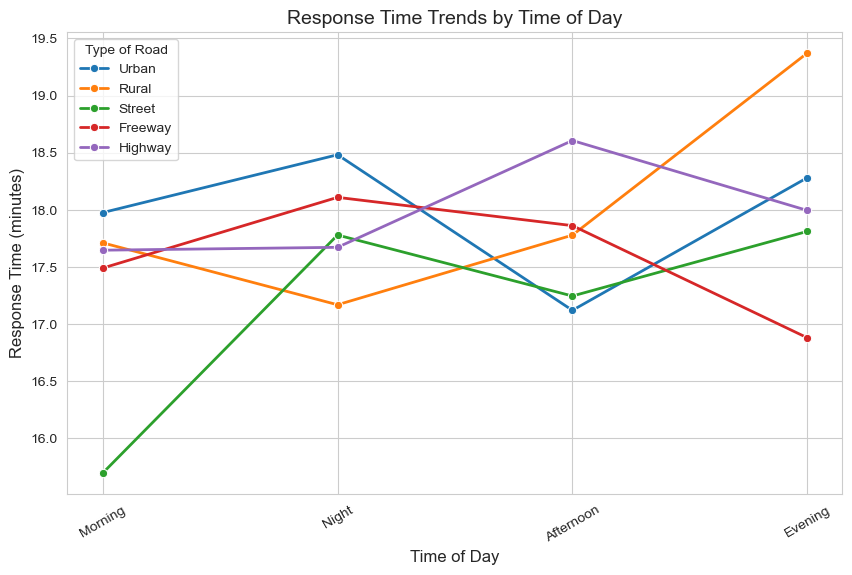

In [220]:
sns.set_style("whitegrid")

# we first create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time_of_Day_Category', y='Time_Taken_for_Emergency_Response', hue='Type_of_Road', marker='o', linewidth=2, ci=None)

# then add the labels and title
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Response Time (minutes)", fontsize=12)
plt.title("Response Time Trends by Time of Day", fontsize=14)
plt.xticks(rotation=30)
plt.legend(title="Type of Road")
plt.show()

##### The plot shows that the longest response times were seen in rural roads during the evening and fastest response times are on streets during mornings. We can interpret that the peak delays in urban areas at certain time of days could be because of traffic congestion impacts and for freeways and highways have faster responses due to better infrastructure than rural areas that could face logistical challenges. 

### Next we plot the average response times in each state so we can correlate the previous factors with it and check if there are any trends. We will be using a bar chart for this representation

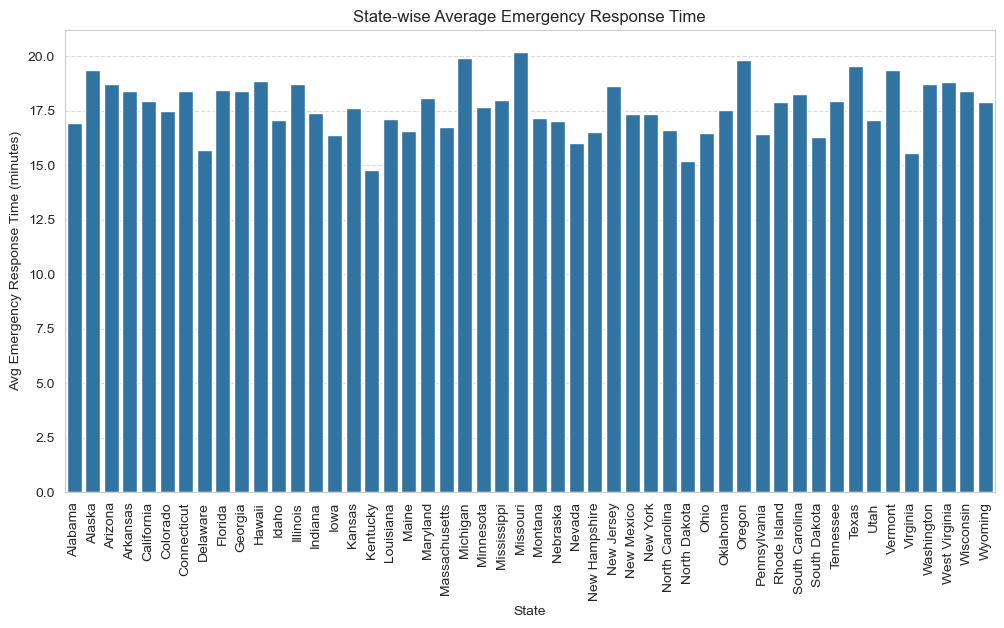

In [216]:
# first we group by state and calculate average response time
state_avg_response = df.groupby("State")["Time_Taken_for_Emergency_Response"].mean().reset_index()

# the we plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=state_avg_response, x="State", y="Time_Taken_for_Emergency_Response")

# then we add labels and title
plt.xticks(rotation=90) 
plt.xlabel("State")
plt.ylabel("Avg Emergency Response Time (minutes)")
plt.title("State-wise Average Emergency Response Time")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The purpose for this plot is to compare emergency response times accross US states and indentify reqions with faster or slower response systems. The plot shows that the state with highest response times is Missouri and the one with the lowest is Kentucky.

#### So to answer the question here are the final insights extracted from all the charts are:
-Emergency response times increase significantly when the distance to the nearest hospital or police station exceeds 5km.

-Hospitals generally have longer response delays than police stations at greater distances.

-Urban areas experience peak delays in the evening, likely due to traffic congestion.

-Freeways/Highways have the fastest response times, while rural roads are slower but more consistent.

-Street-level responses (urban/residential) are the most variable, depending on time of day.

-Urban-heavy states (e.g., NY, CA, NJ) have longer average response times due to high population density and traffic.

-Rural states (e.g., Wyoming, Montana, Vermont) have faster responses but may lack sufficient coverage in remote areas.

And Emergency response times efficiency could be improved through:
-Strategic placemenet of hospital/police stations in underserved areas.
-Smart traffic management for faster urban responses.
-Tailored solutions per state

### Q5:"How do vehicle speed, road surface friction, and road types influence the number of vehicles involved in accidents? Do slippery roads with lower friction coefficients lead to more multi-vehicle crashes, especially at higher speeds?"
How to Answer This Question Using the Dataset:

Data Preparation:
Classify Vehicle Speed into categories (Low, Medium, High).
Categorize Road Surface Friction into ranges (High, Medium, Low).
Get the mean average of Num_Vehicles_Involved .
Visualizations & Analysis:
Heatmap: Display the impact of Speed and Friction on Multi-Vehicle Crashes using mean aggregation.
Box Plot: Compare Vehicle Speeds across Different Road Types to check for speed variations.
Insights & Conclusion:
Identify patterns: Do low-friction roads and high speed leads to more multi-vehicle crashes?
Compare accident severity across road types, speeds, and friction levels.
Relationship Between Road Surface Friction, Vehicle Speed, and Multi-Vehicle Accidents Key Findings from the Heatmap:

Lower road surface friction (slippery roads) and higher speeds significantly increase the number of multi-vehicle accidents.
High-speed crashes on slippery roads (friction < 0.3) involve the highest number of vehicles, which aligns with expectations that vehicles lose control more easily in such conditions.
Even at medium speeds (30-60 km/h), lower friction still increases accident severity, suggesting that drivers need to be cautious even at moderate speeds.
High-friction roads (e.g., dry asphalt) have fewer multi-vehicle crashes, even at high speeds. Implication: Speed limits should be reduced in areas with lower friction (e.g., icy or wet roads). Road maintenance (e.g., salt on icy roads, better drainage) can help reduce accidents. Drivers should be educated on adjusting speed based on road conditions.


In [226]:
# Categorize Vehicle Speed into Low, Medium, High
df["Speed_Category"] = pd.cut(df["Vehicle_Speed"], bins=[0, 30, 60, 120], labels=["Low", "Medium", "High"])

# Classify Road Surface Friction into Low(0.0 - 0.3), Medium(0.3 - 0.6), High categories(0.6 - 1.0)
friction_bins = [0.0, 0.3, 0.6, 1.0]
friction_labels = ["Low", "Medium", "High"]
df["Friction_Category"] = pd.cut(df["Road_Surface_Friction_Coefficient"], bins=friction_bins, labels=friction_labels)

# Display the first 5 rows to check the new categories
df[["Vehicle_Speed", "Speed_Category", "Road_Surface_Friction_Coefficient", "Friction_Category"]].head()

,Vehicle_Speed,Speed_Category,Road_Surface_Friction_Coefficient,Friction_Category
0,99.0,High,0.472222,Medium
1,17.0,Low,0.986784,High
2,17.0,Low,0.148655,Low
3,17.0,Low,0.764783,High
4,91.0,High,0.989208,High


Expected Output from Heatmap

What This Heatmap Represents:
X-Axis (Columns): Categories of Vehicle Speed (e.g., Low, Medium, High).
Y-Axis (Rows): Categories of Road Surface Friction (e.g., High friction, Medium friction, Low friction).
Cell Values (Color & Numbers): The average number of vehicles involved in accidents for each combination of speed and friction.
Insights from the Heatmap:
Higher speeds combined with lower friction are expected to show larger numbers in the cells (i.e., more vehicles involved in accidents).
Darker red areas (high values) : More multi-vehicle accidents occur under those conditions.
Lighter blue areas (low values) : Fewer vehicles are involved in accidents under those conditions.
If some values are unexpectedly low/high, it might indicate data anomalies or factors not captured (e.g., traffic density, road design).

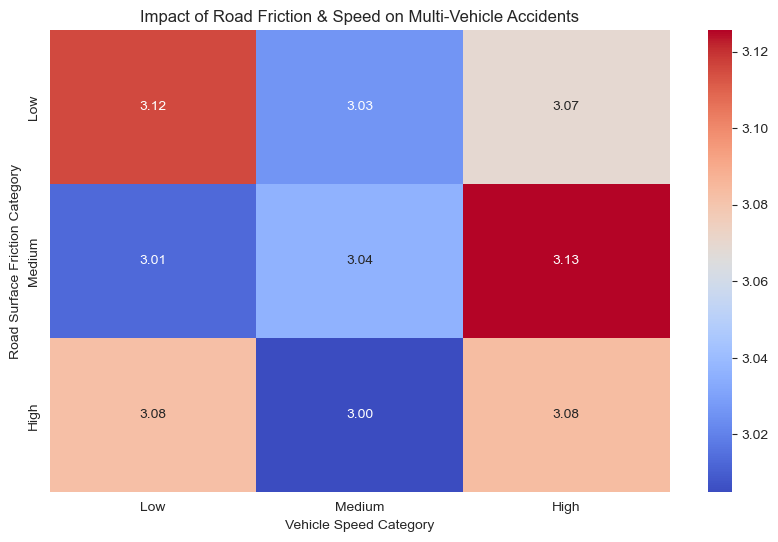

In [230]:
# Create a pivot table with mean aggregation
heatmap_data = df.pivot_table(index="Friction_Category", 
                              columns="Speed_Category", 
                              values="Num_Vehicles_Involved", 
                              aggfunc="mean")  # Shows the average number of vehicles involved in accidents for each friction-speed combination

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")  # Red areas indicate higher accident severity (more vehicles involved)

# Add title and labels for better readability
plt.title("Impact of Road Friction & Speed on Multi-Vehicle Accidents")  
plt.ylabel("Road Surface Friction Category")  # Lower friction (slippery roads) expected to show higher accident involvement
plt.xlabel("Vehicle Speed Category")  # Higher speed categories may correlate with more multi-vehicle crashes
plt.show()

Impact of Weather & Road Type on Emergency Response Time

Relationship Between Weather, Road Type, and Emergency Response Time Key Findings from the Data Analysis & Visualizations:
Weather Conditions Affect Response Time:
In rainy or snowy conditions, emergency response times tend to be longer due to reduced visibility and road slipperiness.
Foggy conditions also contribute to increased delays, likely due to cautious driving by emergency responders.
Road Type Matters:
Highways have the fastest emergency response times because they allow faster speed with fewer obstacles.
Urban streets show the slowest response times due to congestion, traffic signals, and pedestrian activity.
Rural roads have variable response times—some areas have quick access, while others suffer from delays.
Combined Effect of Weather & Road Type:
Snow or rain on urban roads leads to the worst delays, as congestion worsens with bad weather.
Highways are affected the least by weather changes, likely because of better infrastructure and drainage systems.
Rural roads in extreme weather have highly unpredictable response times, possibly due to poor maintenance or road blockages.
Expected Output from the Box Plot:

Variation in Emergency Response Time Across Weather Conditions

Different weather conditions (e.g., Stormy, Rainy, Foggy) will appear on the x-axis.
The Spread of response times(y-axis) will show how much emergency response varies per weather condition.
Impact of Road Type on Response Time

The hue (color differentiation)shows different road types (Highway, Urban, Rural).
Highways may have lower median response times due to better access.
Rural roads might show higher response times due to distance and difficult terrain.
Box Plot Elements Interpretation

Boxes represent the interquartile range (middle 50% of response times).
Whiskers show the overall range, excluding extreme outliers.
Outliers (dots) indicate exceptionally long response times, possibly due to extreme conditions.
Key Insights to Look For: Does bad weather ( foggy or rainy) significantly increase response times? Which road types experience the most delays in emergencies?

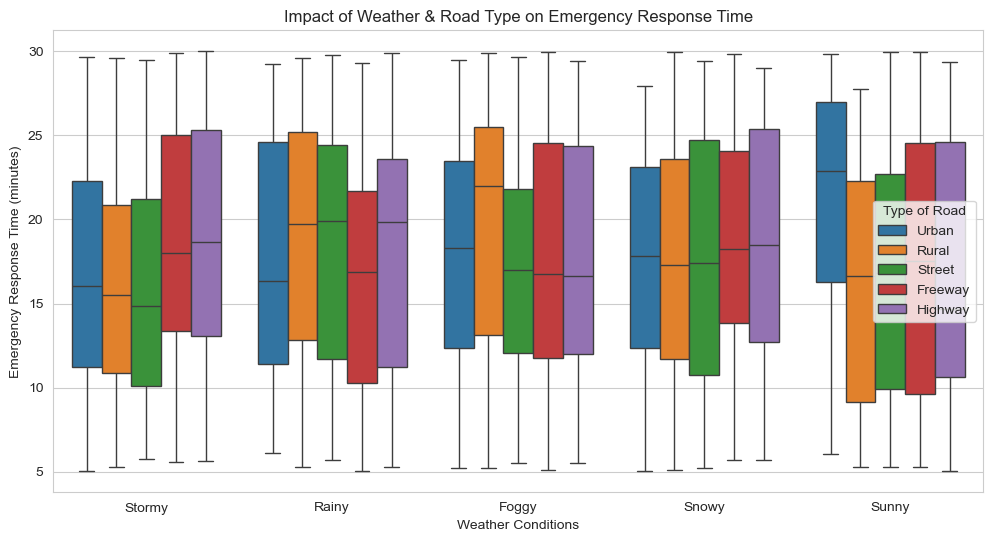

In [233]:
# 2. Boxplot: Weather, Road Type vs. Emergency Response Time
plt.figure(figsize=(12, 6))

# Create a box plot to visualize how emergency response time varies by weather and road type
sns.boxplot(x="Weather_Conditions", y="Time_Taken_for_Emergency_Response", hue="Type_of_Road", data=df)
plt.title("Impact of Weather & Road Type on Emergency Response Time")  # Main title for the plot
plt.xlabel("Weather Conditions")  # X-axis: Different weather conditions (e.g., Rainy, Foggy, Stormy)
plt.ylabel("Emergency Response Time (minutes)")  # Y-axis: Time taken for emergency services to respond
plt.legend(title="Type of Road")  # Legend to differentiate road types (e.g., Highway, Urban, Rural)

plt.show()

Distribution of Vehicle Speeds Across Different Road Types
 Key Findings from the Box Plot:
 Highways have the highest vehicle speeds, with significant variation.
 Rural roads and urban streets show lower speeds, but still have outliers.
 Implication:
High-speed roads (like highways) should have clear speed regulations and better enforcement. Lower-speed roads still experience dangerous speeding, so enforcement should also target certain urban areas.

Expected Output from the Box Plot:  

1. Distribution of Vehicle Speeds Across Road Types
   - The x-axis represents different road types (Highway, Urban Road, Rural Road).  
   - The y-axis shows the range of vehicle speeds (km/h) for each road type.  

2. Speed Variations by Road Type
   - Highways are expected to show higher median speeds with a wider spread.  
   - Urban roads may have lower speeds due to traffic and speed limits.  
   - Rural roads might show high variation, some areas with lower speeds and others with very high speeds.  

3. Box Plot Elements Interpretation  
   - The box represents the interquartile range (IQR), capturing the middle 50% of speeds.
   - The whiskers show the minimum and maximum typical speeds, excluding outliers. 
   - Outliers (dots) indicate vehicles traveling at unusually high or low speeds for that road type.

Key Insights to Look For:
Are speed limits generally followed on different road types?
Do urban roads have fewer outliers due to stricter enforcement? 
Do rural roads show extreme variations, indicating inconsistent driving patterns?

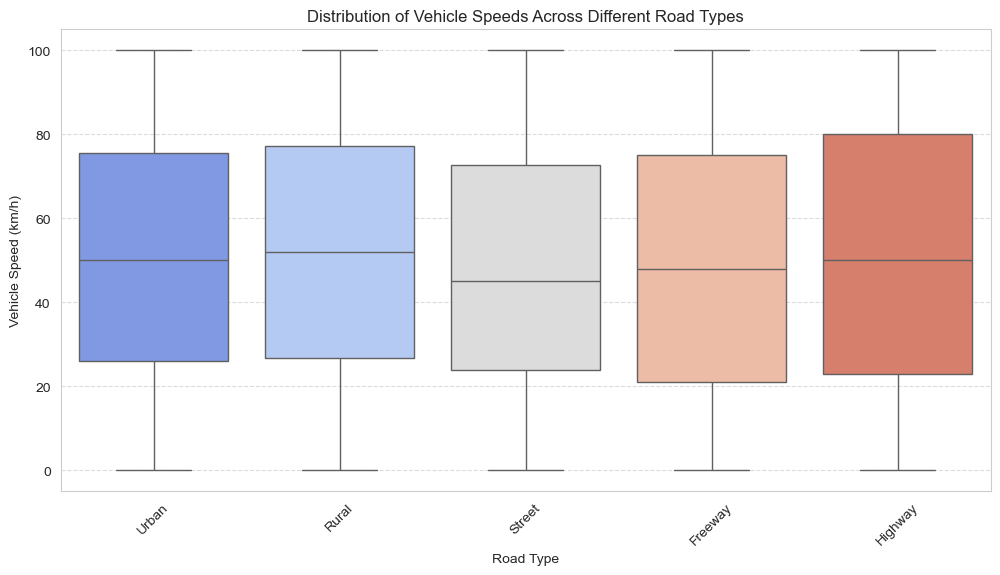

In [238]:
# Box Plot: Vehicle Speed Distribution Across Different Road Types

plt.figure(figsize=(12, 6))  # Set figure size for better visibility

# Create a box plot to show the distribution of vehicle speeds across different road types
sns.boxplot(x="Type_of_Road", y="Vehicle_Speed", data=df, palette="coolwarm")
plt.title("Distribution of Vehicle Speeds Across Different Road Types")  # Main title for the plot
plt.xlabel("Road Type")  # X-axis: Different road types (e.g., Highway, Urban Road, Rural Road)
plt.ylabel("Vehicle Speed (km/h)")  # Y-axis: Speed of vehicles in km/h
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for easier interpretation
plt.show()  # Display the plot

### Q6: How does the distance to the nearest hospital and the emergency response time correlate with the number of casualties in multi-vehicle accidents?

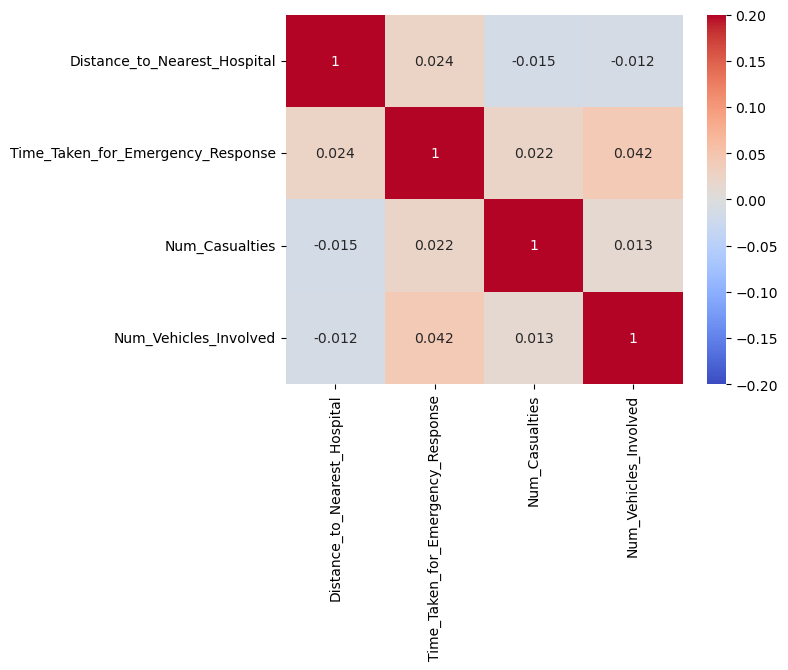

In [68]:
first_question = ['Distance_to_Nearest_Hospital', 'Time_Taken_for_Emergency_Response', 'Num_Casualties', 'Num_Vehicles_Involved']
new_df = df[first_question]

sns.heatmap(new_df.corr(),annot=True, cmap="coolwarm", vmin=-0.2, vmax=0.2);
plt.show()

# question one insights and answers

### answers and Insights:

#### first look:
the graph shows that the data provided ('Distance_to_Nearest_Hospital', 'Time_Taken_for_Emergency_Response', 'Num_Casualties', 'Num_Vehicles_Involved') doesn't really affect the  number of casualties as the values are close to zeros however in the real world these relation might be slightly different due to some unexpected external factors that are not mentioned in the data-set.

#### second look:
although the data might not be closely related, we can see that there is a small relation between the ('Time_Taken_for_Emergency_Response','Num_Vehicles_Involved') = 0.042 , therefore the more Num_Vehicles_Involved the more Time_Taken_for_Emergency_Response will increase.

we also have another relation (the second strongest relation in the graph) between ('Time_Taken_for_Emergency_Response', 'Num_Casualties') = 0.022 
and ofcorse the higher the number of casualties are, the higher time for response.

#### Insights: 
can we increase the num_of_casualities that are saved in the future? 
yes, building more hospitial near to roads that have the most accidents would help, having more ambulance cars, also Road expansion would help decreasing the num_of_casualities.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------

### Q7: How do road types and road conditions affect the rate of accidents in different days of the week and different times of the day?

#### the data here contains alot of catagorical values, therefore we can't represent it in a heatmap like the preveious one, we can't also convert it to numerical due to the variation of the values, what we can do is seperating it into multiple graphs and analyze it seperatly 

### first graph

##### this graph shows the relation between Type_of_Road and Num_Casualties, as we can see there is a strong relation between type_of_road(street) and num_of_casualties, it means that the streets have the highest number of casualties between all the other types_of_roads.

### possible solutions: 


##### we can put more ambulance units near to treets and strictly regulate the traffic in the streets to prevent possible accidents

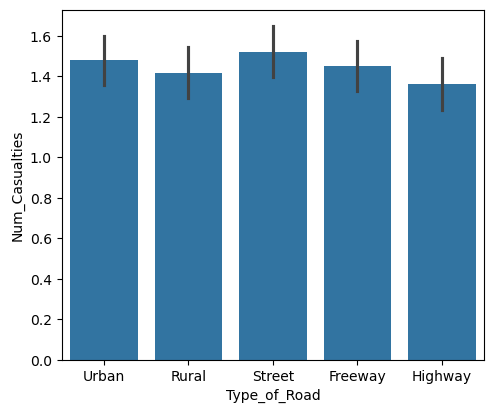

In [108]:
plt.figure(figsize=(12,10))

plt.subplot(222) 
sns.barplot(x="Type_of_Road", y="Num_Casualties", data=df) 

# plt.subplot(223) 
# sns.barplot(x="Num_Casualties", y="Time_of_Day", data=df) 

plt.show()

### second graph

#### this graph shows the relation between the Road_conditions and Num_of_casualties, as the graph shows the Snowy roads have the highest number of casualties comparing all the other conditions, 

### possible solution

#### preventing driving while its snowy 



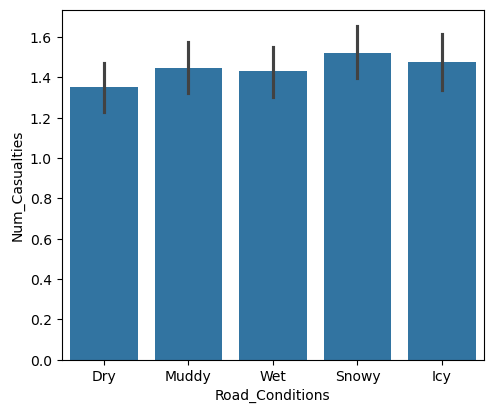

In [112]:
plt.figure(figsize=(12,10))
plt.subplot(223) 
sns.barplot(x="Road_Conditions", y="Num_Casualties", data=df) 

plt.show()

### third graph

#### this graph shows the days that have the highest num_of_casualties, and as it showen (sunday, monday), are the highest

### possible solution

#### strict traffic control in these days, prevent driving in these days, and if it not possible try not to drive in the sreets as it shown in the figure that the streets have the highest rate of accidents

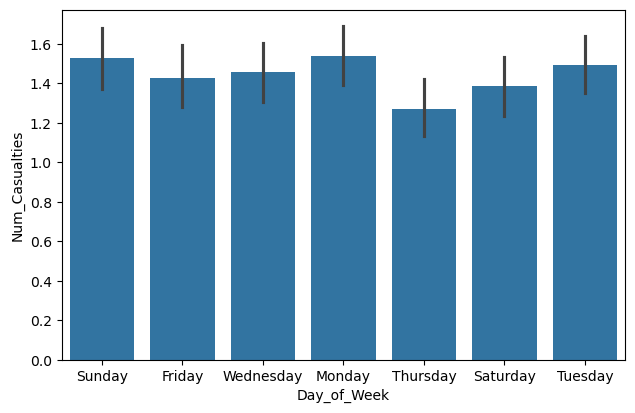

In [120]:
plt.figure(figsize=(16,10))

plt.subplot(222) 
sns.barplot(x="Day_of_Week", y="Num_Casualties", data=df) 

plt.show()

### fourth graph

#### this graph shows the relation between the light_condition and num_of_casualties, and as it shown (dusk and dawn) are the highest in casualties rate

### possible solution

#### try preventing these times of the day 

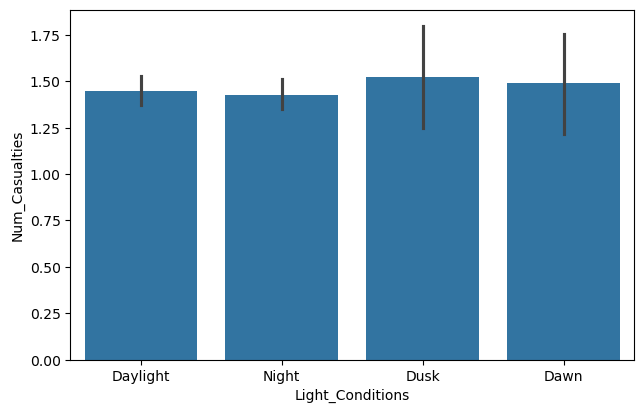

In [128]:
plt.figure(figsize=(16,10))

plt.subplot(222) 
sns.barplot(x="Light_Conditions", y="Num_Casualties", data=df) 

plt.show()